## Assignment:

Beat the performance of my Lasso regression by **using different feature engineering steps ONLY!!**.

The performance of my current model, as shown in this notebook is:

- test mse: 1063016789.3316755
- test rmse: 32603.938248801718
- test r2: 0.8453144708738004

To beat my model you will need a test r2 bigger than 0.85 and a rmse smaller than 32603.


=====================================================================================================


### Conditions:

- You MUST NOT change the hyperparameters of the Lasso.
- You MUST use the same seeds in Lasso and train_test_split as I show in this notebook (random_state)
- You MUST use all the features of the dataset (except Id) - you MUST NOT select features


=====================================================================================================


### If you beat my model:

Make a pull request with your notebook to this github repo:
https://github.com/solegalli/udemy-feml-challenge

And add your notebook to the folder:

-StudentsSolutions_v1.0.0

### How to make the PR

1) fork the repo:

Go to https://github.com/solegalli/udemy-feml-challenge, and click on the **fork** button at the top-right

2) clone your forked repo into your local computer:

- Go to www.github.com/yourusername/udemy-feml-challenge
- Click the green button that says clone or download
- copy the url that opens up
- power up a git console
- type: git clone (paste the url you copied from github)
- done

3) Make a copy of the jupyter notebook and add your name:

- Open up the Jupyter notebook called 13-Assignement.ipynb
- Click the "File" button at the top-right and then click "Make a copy"
- **Work your solution in the Copy** and not in the original assignment (otherwise there will be conflicts when making the PR)
- Change the name of the copy of the notebook to: 13-Assignement_yourname.ipynb
- Move the notebook to the folder **StudentsSolutions_v1.0.0**
- done

When you finish, just commit the new notebook to your fork and then make a PR to my repo.

- git add StudentsSolutions_v1.0.0/13-Assignement_yourname.ipynb
- git commit -m "your commit message"
- git push origin master or git push origin yourfeaturebranch
- go to your repo and make a pull request.


## But i have a notebook ready and I haven't cloned the repo yet, how can I make the PR?

If you worked in the copy you downloaded from Udemy before forking and cloning this repo, then follow this steps:

1) fork the repo:

Go to https://github.com/solegalli/udemy-feml-challenge, and click on the fork button at the top-right

2) clone your forked repo into your local computer:

Go to www.github.com/yourusername/udemy-feml-challenge

- Click the green button that says clone or download
- Copy the url that opens up
- Power up a git console
- Type: git clone (paste the url you copied from github)
- Done

3) Rename your solution as follows and copy it into your cloned repo:

- Rename your solution notebook to: 13-Assignement_yourname.ipynb
- Copy this file into the cloned repo, inside the folder **StudentsSolutions_v1.0.0**
- Done

When you finish, just commit the new notebook to your fork and then make a PR to my repo

- git add StudentsSolutions_v1.0.0/13-Assignement_yourname.ipynb
- git commit -m "your commit message"
- git push origin master or git push origin yourfeaturebranch
- go to your repo and make a pull request.

**Good luck!!**

## House Prices dataset

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# for the model
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# for feature engineering
from sklearn.preprocessing import MinMaxScaler
from feature_engine import imputation as mdi
from feature_engine import discretisation as dsc
from feature_engine import encoding as ce

### Load Datasets

In [2]:
# load dataset

data = pd.read_csv('../houseprice.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# make lists of variable types

categorical = [var for var in data.columns if data[var].dtype == 'O']

year_vars = [var for var in data.columns if 'Yr' in var or 'Year' in var]

discrete = [
    var for var in data.columns if data[var].dtype != 'O'
    and len(data[var].unique()) < 20 and var not in year_vars
]

numerical = [
    var for var in data.columns if data[var].dtype != 'O'
    if var not in discrete and var not in ['Id', 'SalePrice']
    and var not in year_vars
]

print('There are {} continuous variables'.format(len(numerical)))
print('There are {} discrete variables'.format(len(discrete)))
print('There are {} temporal variables'.format(len(year_vars)))
print('There are {} categorical variables'.format(len(categorical)))

There are 18 continuous variables
There are 14 discrete variables
There are 4 temporal variables
There are 43 categorical variables


In [11]:
categorical

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

### Separate train and test set

In [23]:
# IMPORTANT: keep the random_state to zero for reproducibility
# Let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(data.drop(
    ['Id', 'SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.1,
    random_state=0)

In [26]:
#checking for variable frequency

for feat in categorical:
    
    print(X_train[feat].value_counts()/len(X_train))

RL         0.788432
RM         0.149924
FV         0.041857
RH         0.012177
C (all)    0.007610
Name: MSZoning, dtype: float64
Pave    0.996195
Grvl    0.003805
Name: Street, dtype: float64
Grvl    0.034247
Pave    0.027397
Name: Alley, dtype: float64
Reg    0.630898
IR1    0.334855
IR2    0.026636
IR3    0.007610
Name: LotShape, dtype: float64
Lvl    0.898782
Bnk    0.042618
HLS    0.032725
Low    0.025875
Name: LandContour, dtype: float64
AllPub    0.999239
NoSeWa    0.000761
Name: Utilities, dtype: float64
Inside     0.729072
Corner     0.170472
CulDSac    0.065449
FR2        0.032725
FR3        0.002283
Name: LotConfig, dtype: float64
Gtl    0.942922
Mod    0.047184
Sev    0.009893
Name: LandSlope, dtype: float64
NAmes      0.152968
CollgCr    0.102740
OldTown    0.077626
Edwards    0.066971
Somerst    0.057078
NridgHt    0.054033
Gilbert    0.052511
Sawyer     0.050989
NWAmes     0.048706
BrkSide    0.040335
SawyerW    0.039574
Crawfor    0.035008
Mitchel    0.035008
Timber   

In [27]:
# calculate elapsed time

def elapsed_years(df, var):
    # capture difference between year variable and
    # year the house was sold
    
    df[var] = df['YrSold'] - df[var]
    return df

for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    X_train = elapsed_years(X_train, var)
    X_test = elapsed_years(X_test, var)

In [28]:
# drop YrSold
X_train.drop('YrSold', axis=1, inplace=True)
X_test.drop('YrSold', axis=1, inplace=True)

In [29]:
# capture the column names for use later in the notebook
final_columns = X_train.columns

## Feature Engineering Pipeline

In [30]:
# I will treat discrete variables as if they were categorical
# to treat discrete as categorical using Feature-engine
# we need to re-cast them as object

X_train[discrete] = X_train[discrete].astype('O')
X_test[discrete] = X_test[discrete].astype('O')

In [78]:
house_pipe = Pipeline([

    # missing data imputation - section 4
    ('missing_ind',
     mdi.AddMissingIndicator(
         variables=['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])),

    ('imputer_num',
     mdi.MeanMedianImputer(
         imputation_method='median',
         variables=['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])),

    ('imputer_cat', mdi.CategoricalImputer(imputation_method = "missing",
                                            variables=categorical)),


    # categorical encoding - section 6
    ('rare_label_enc',
     ce.RareLabelEncoder(tol=0.05, n_categories=1, variables=categorical + discrete)),

    # newly available categorical encoder, uses trees predictions
    ('categorical_enc',
     ce.DecisionTreeEncoder(random_state=2909, variables=categorical + discrete)),

    # discretisation - section 8
    ('discretisation',
     dsc.DecisionTreeDiscretiser(random_state=2909, variables=numerical)),

    # feature Scaling - section 10
    ('scaler', MinMaxScaler()),

    # regression
    ('lasso', Lasso(random_state=0))
])

In [79]:
# using GridSearch

param_grid = {
    # try different feature engineering parameters
    'imputer_num__imputation_method': ['mean', 'median'],
    'imputer_cat__imputation_method': ['missing','frequent'],
    'rare_label_enc__tol': [0.005, 0.007, 0.01,0.03],
    'rare_label_enc__n_categories': [1,2,3],
}


# now we set up the grid search with cross-validation
grid_search = GridSearchCV(house_pipe, param_grid,
                           cv=5, n_jobs=-1, scoring='roc_auc')


In [80]:
# and now we train over all the possible combinations of the parameters above
grid_search.fit(X_train, y_train)

C:\Users\bglag\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('missing_ind',
                                        AddMissingIndicator(variables=['LotFrontage',
                                                                       'MasVnrArea',
                                                                       'GarageYrBlt'])),
                                       ('imputer_num',
                                        MeanMedianImputer(variables=['LotFrontage',
                                                                     'MasVnrArea',
                                                                     'GarageYrBlt'])),
                                       ('imputer_cat',
                                        CategoricalImputer(variables=['MSZoning',
                                                                      'Street',
                                                                      'Alley',
                                                                      'LotShape',
                                                                      'LandContour',
                                                                      'Utilities',
                                                                      'LotConfig',
                                                                      'LandS...
                                                                           'OpenPorchSF',
                                                                           'EnclosedPorch',
                                                                           '3SsnPorch',
                                                                           'ScreenPorch',
                                                                           'MiscVal'])),
                                       ('scaler', MinMaxScaler()),
                                       ('lasso', Lasso(random_state=0))]),
             n_jobs=-1,
             param_grid={'imputer_cat__imputation_method': ['missing',
                                                            'frequent'],
                         'imputer_num__imputation_method': ['mean', 'median'],
                         'rare_label_enc__n_categories': [1, 2, 3],
                         'rare_label_enc__tol': [0.005, 0.007, 0.01, 0.03]},
             scoring='roc_auc')

In [81]:
#obtaining out the best estimators
grid_search.best_estimator_

Pipeline(steps=[('missing_ind',
                 AddMissingIndicator(variables=['LotFrontage', 'MasVnrArea',
                                                'GarageYrBlt'])),
                ('imputer_num',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['LotFrontage', 'MasVnrArea',
                                              'GarageYrBlt'])),
                ('imputer_cat',
                 CategoricalImputer(variables=['MSZoning', 'Street', 'Alley',
                                               'LotShape', 'LandContour',
                                               'Utilities', 'LotConfig',
                                               'LandSlop...
                ('discretisation',
                 DecisionTreeDiscretiser(random_state=2909,
                                         variables=['LotFrontage', 'LotArea',
                                                    'MasVnrArea', 'BsmtFinSF1',
                                                    'BsmtFinSF2', 'BsmtUnfSF',
                                                    'TotalBsmtSF', '1stFlrSF',
                                                    '2ndFlrSF', 'LowQualFinSF',
                                                    'GrLivArea', 'GarageArea',
                                                    'WoodDeckSF', 'OpenPorchSF',
                                                    'EnclosedPorch',
                                                    '3SsnPorch', 'ScreenPorch',
                                                    'MiscVal'])),
                ('scaler', MinMaxScaler()), ('lasso', Lasso(random_state=0))])

In [82]:
#obtaining best fit parameter
grid_search.best_params_

{'imputer_cat__imputation_method': 'missing',
 'imputer_num__imputation_method': 'mean',
 'rare_label_enc__n_categories': 1,
 'rare_label_enc__tol': 0.005}

In [83]:
# let's get the predictions
X_train_preds = grid_search.predict(X_train)
X_test_preds = grid_search.predict(X_test)

In [84]:
# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds, squared=True)))
print('train rmse: {}'.format(mean_squared_error(y_train, X_train_preds, squared=False)))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds,squared=True)))
print('test rmse: {}'.format(mean_squared_error(y_test, X_test_preds, squared=False)))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

train mse: 587444609.0895277
train rmse: 24237.25663290975
train r2: 0.9059160110807516

test mse: 939129510.1437745
test rmse: 30645.220021135017
test r2: 0.8633420030120594


Text(0, 0.5, 'Predicted Price')

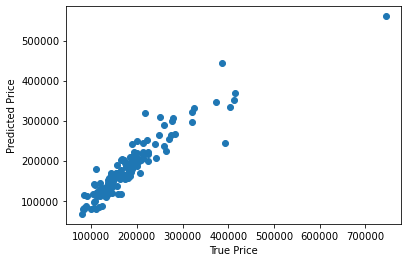

In [85]:
# plot predictions vs real value

plt.scatter(y_test,X_test_preds)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

<AxesSubplot:>

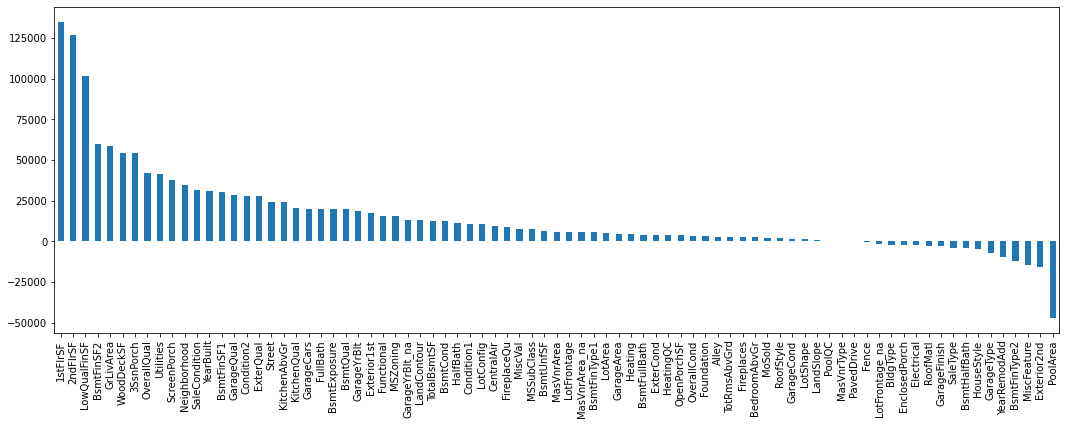

In [86]:
# let's explore the importance of the features
# the importance is given by the absolute value of the coefficient
# assigned by the Lasso

importance = pd.Series(grid_search.best_estimator_.named_steps['lasso'].coef_)
importance.index = list(final_columns)+['LotFrontage_na', 'MasVnrArea_na',  'GarageYrBlt_na']
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))